In [1]:
#Salary_Data.csv
#https://mitu.co.in/datatset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../datasets/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Seperate the input and output variables

In [4]:
x = df[['YearsExperience']]

y = df['Salary']

In [5]:
x.shape, y.shape

((30, 1), (30,))

In [6]:
df.corr()                              #highly correlated data, hence linear regression is possible as > 80%

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


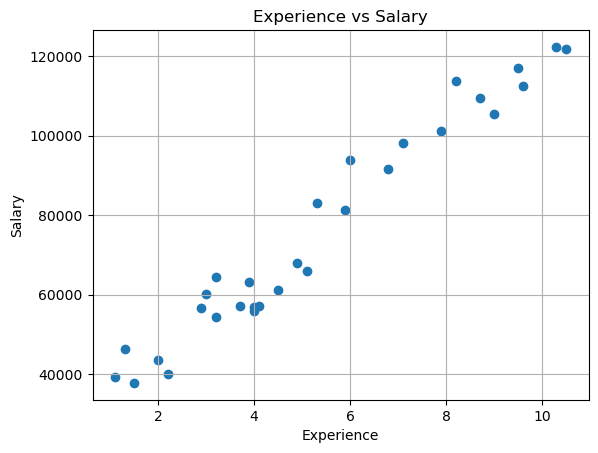

In [7]:
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

Cross Validation

In [8]:
#import the function
from sklearn.model_selection import train_test_split
#split the data in training (75%) and testing (25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22, 1), (8, 1), (22,), (8,))

In [10]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


Build the model

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [12]:
regressor.coef_ # m value in y=mx+c

array([9379.71049195])

In [13]:
regressor.intercept_ # c value in y=mx+c

26986.691316737248

In [14]:
regressor.predict([[12]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

In [15]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


Predict on  the test data

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
y_pred


array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [19]:
result = pd.DataFrame({
    'x': x_test['YearsExperience'],
    'y': y_test['Salary'],
    'y^': y_pred,
    'Error': y_pred - y_test,
    'abs(Error)' : abs(y_pred - y_test)
})

KeyError: 'Salary'

In [20]:
#mean absolute error
np.mean(abs(y_pred - y_test))

3508.5455930660555

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [22]:
result = pd.DataFrame({
    'x': x_test['YearsExperience'],
    'y': y_test['Salary'],
    'y^': y_pred,
    'Error': y_pred - y_test,
    'RMS Error' : (y_pred - y_test)**2
})

KeyError: 'Salary'

In [23]:
np.sqrt(np.mean((y_pred-y_test)**2))

4733.70258289858

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

4733.70258289858

R-Squared Error (Gives Accuracy of Linear Regresssion Model)

In [25]:
mean_val = np.mean(y_test)
mean_val

84406.25

In [26]:
num = np.sum((y_test - mean_val) ** 2) - np.sum((y_test - y_pred) ** 2)
r2 = num /np.sum((y_test - mean_val) ** 2)
r2

0.9779208335417601

In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [ ]:
regressor.score(x_test, y_test)

In [ ]:
regressor.score(x, y)

In [ ]:
regressor.score(x_train, y_train)

Visualize

In [ ]:
y_pred =  regressor.predict(x)

In [ ]:
plt.grid()
plt.title('Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y, color = 'green', label = 'actual')
plt.plot(x, y_pred, color = 'red', label = 'predicted')
plt.legend()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)*100

In [ ]:
exp = float(input('Enter the Experience: '))
exp = pd.DataFrame({'YearsExperience:'[exp]})
sal = regressor.predict(exp)
print('Your expected salary can be:',sal[0])